# 1. Overview

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
# Normalize column names to snake_case
df.columns = (
    df.columns
    .str.strip()
    .str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.replace(r'[^0-9a-zA-Z]+', '_', regex=True)
    .str.strip('_')
    .str.lower()
)
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [394]:
def create_spec(data):
    spec = pd.DataFrame(data.dtypes)
    spec = spec.rename(columns={0: "dtype"})
    spec["count"] = data.count()
    spec["uniq_count"] = data.nunique()
    spec["na_count"] = data.isnull().sum()
    spec = spec.sort_values(by="dtype")
    return spec


create_spec(df)

,dtype,count,uniq_count,na_count
year,int64,11914,28,0
highway_mpg,int64,11914,59,0
city_mpg,int64,11914,69,0
popularity,int64,11914,48,0
msrp,int64,11914,6049,0
engine_hp,float64,11845,356,69
engine_cylinders,float64,11884,9,30
number_of_doors,float64,11908,3,6
make,object,11914,48,0
model,object,11914,915,0


# 2. Descriptive Analysis

## 2.1 Categorical Columns

In [395]:
cat_spec = df.describe(include=['object']).T
cat_spec

,count,unique,top,freq
make,11914,48,Chevrolet,1123
model,11914,915,Silverado 1500,156
engine_fuel_type,11911,10,regular unleaded,7172
transmission_type,11914,5,AUTOMATIC,8266
driven_wheels,11914,4,front wheel drive,4787
market_category,8172,71,Crossover,1110
vehicle_size,11914,3,Compact,4764
vehicle_style,11914,16,Sedan,3048


### Top 10 Values

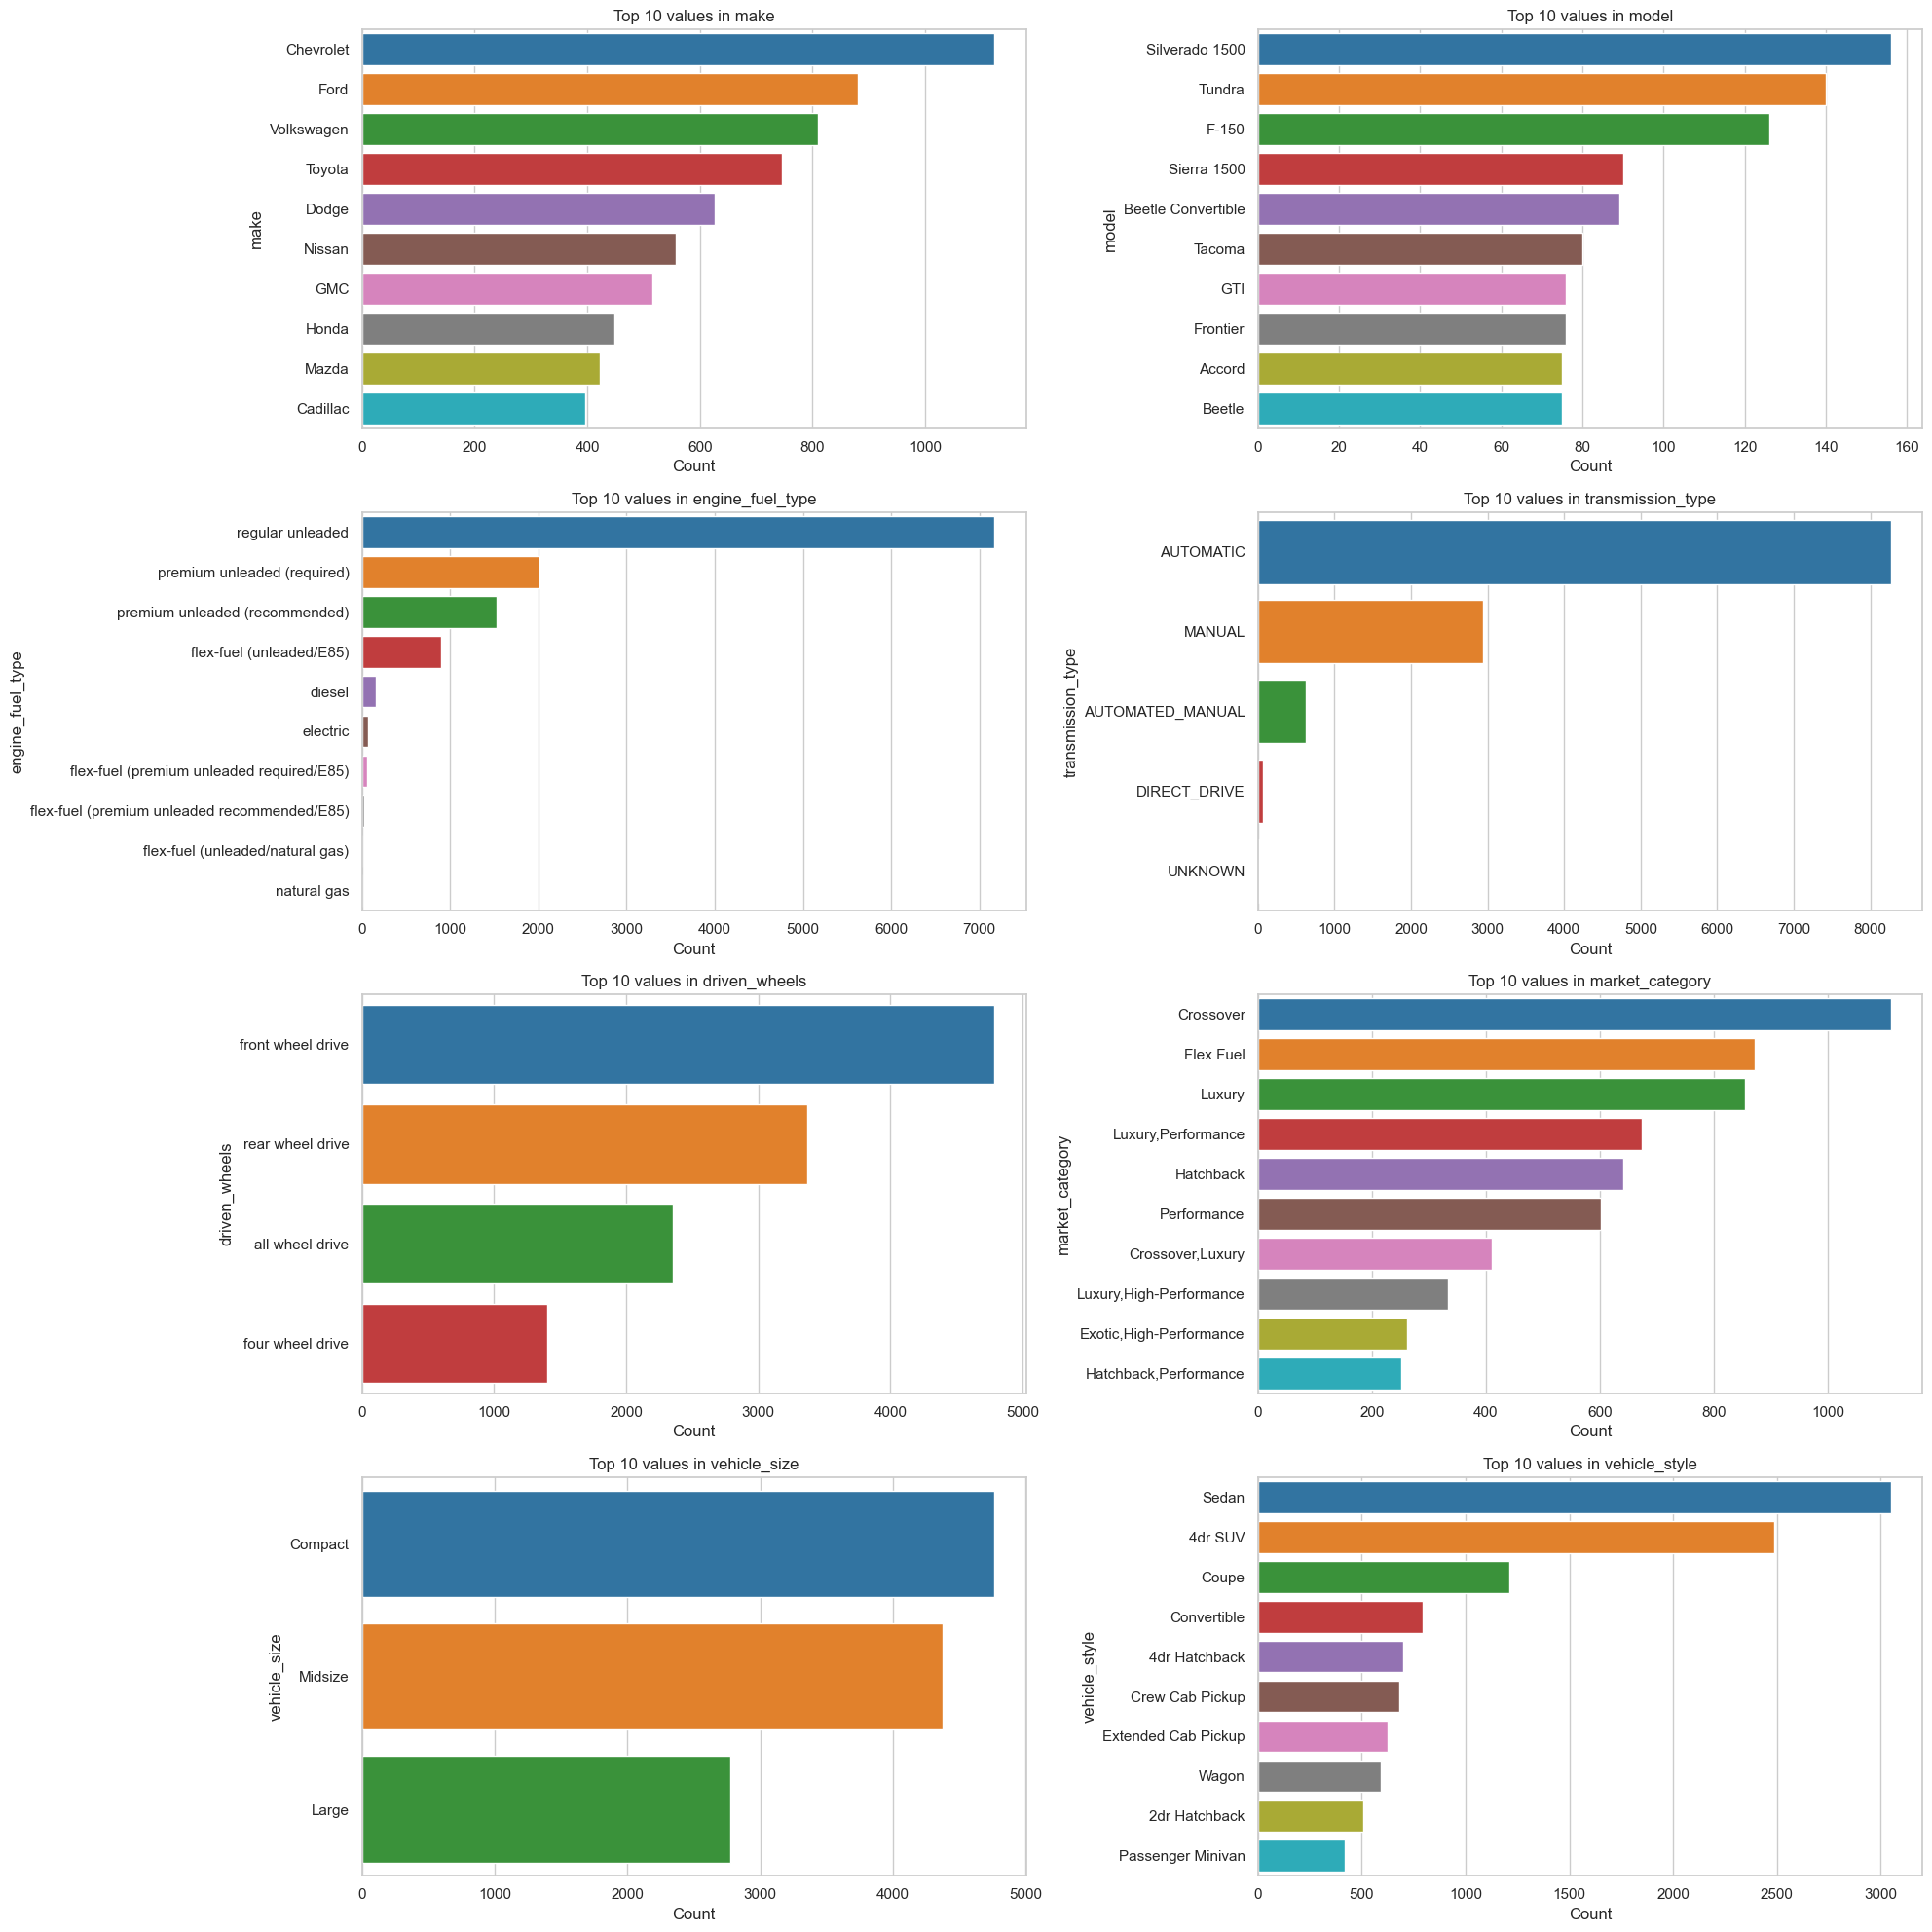

In [396]:
categorical_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_columns[:8]):
    top_counts = df[col].value_counts().head(10)
    palette = sns.color_palette("tab10", n_colors=len(top_counts))
    sns.barplot(
        x=top_counts.values,
        y=top_counts.index,
        orient='h',
        ax=axes[i],
        hue=top_counts.index,
        palette=palette
    )
    axes[i].set_title(f'Top 10 values in {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide unused axes
for j in range(len(categorical_columns), 8):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## 2.2 Numerical Columns

In [397]:
df.describe(include=['number']).T


,count,mean,std,min,25%,50%,75%,max
year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
engine_hp,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
engine_cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
number_of_doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
msrp,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


### Histograms

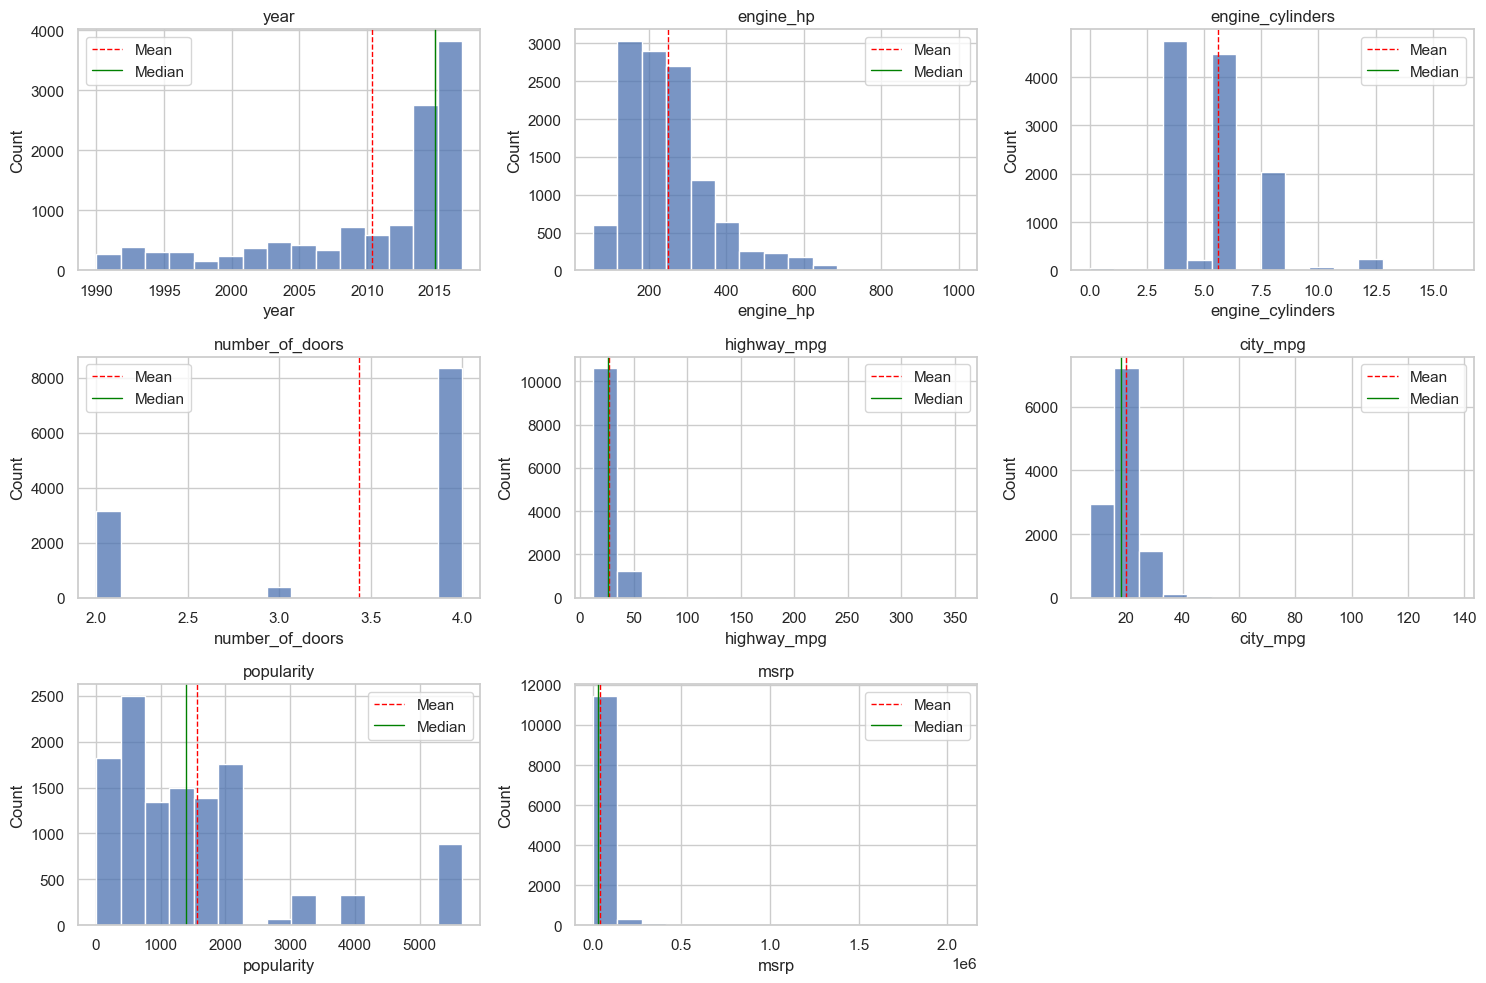

In [398]:
import numpy as np

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=15)
    mean = np.mean(df[col])
    median = np.median(df[col])
    plt.axvline(mean, color='red', linestyle='--', linewidth=1, label='Mean')
    plt.axvline(median, color='green', linestyle='-', linewidth=1, label='Median')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

### Boxplots with outliers

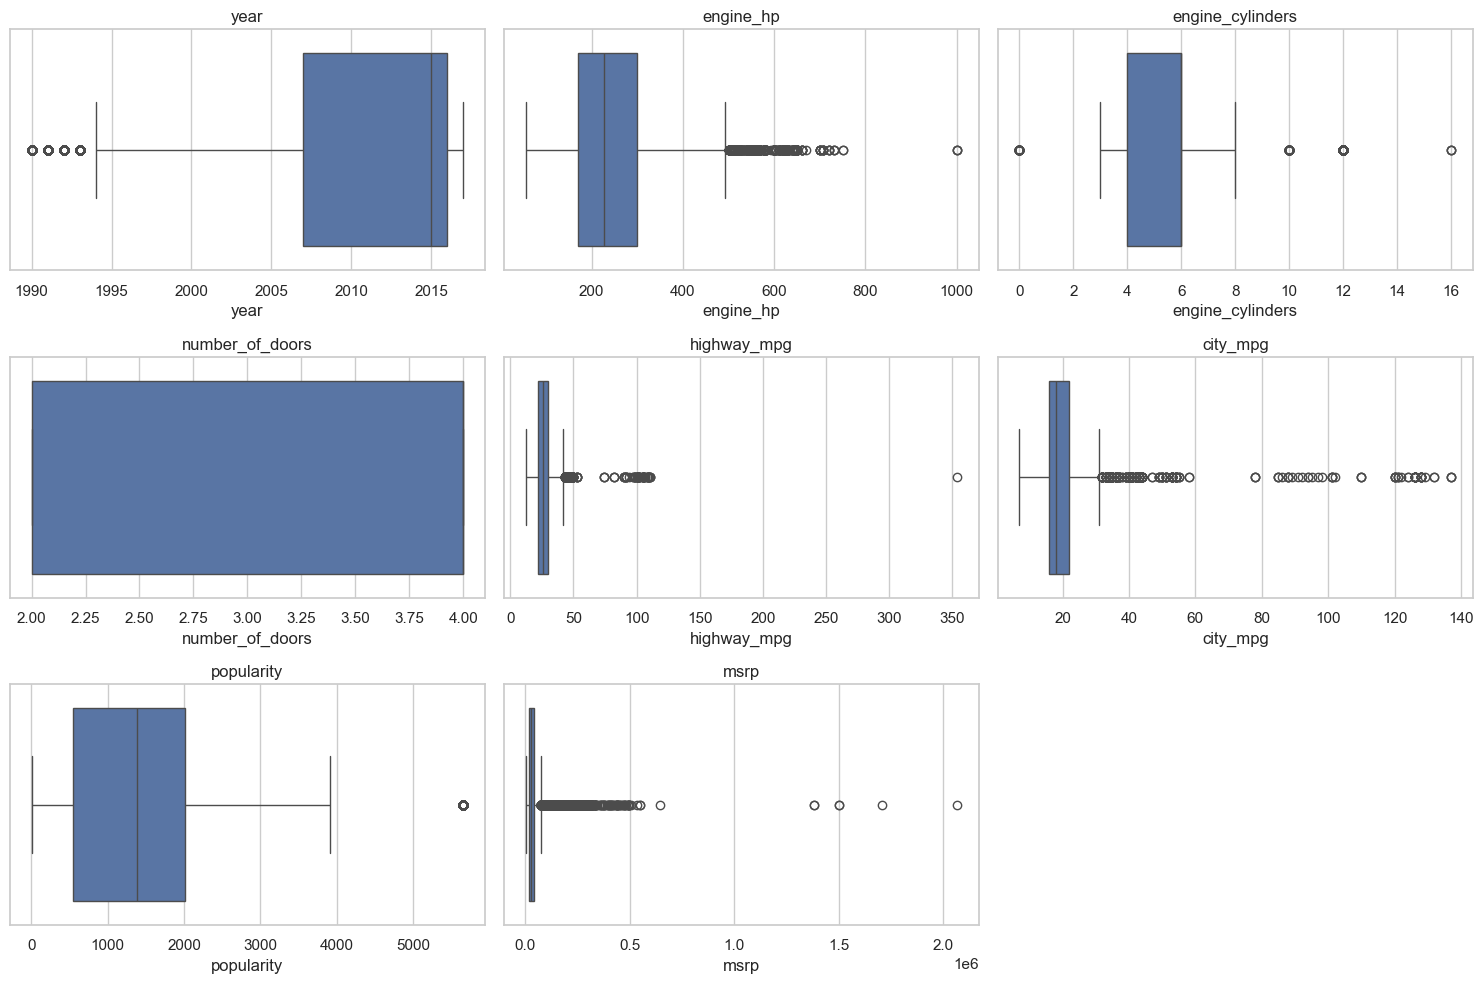

In [399]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## 2.3 Feature Engineering



### Remove duplicates

In [400]:
print(df[df.duplicated()].shape)
df2 = df.drop_duplicates()
create_spec(df2)


(715, 16)


,dtype,count,uniq_count,na_count
year,int64,11199,28,0
highway_mpg,int64,11199,59,0
city_mpg,int64,11199,69,0
popularity,int64,11199,48,0
msrp,int64,11199,6049,0
engine_hp,float64,11130,356,69
engine_cylinders,float64,11169,9,30
number_of_doors,float64,11193,3,6
make,object,11199,48,0
model,object,11199,915,0


### Remove missing values


In [401]:
# drop columns with more than 35% missing values
threshold = 0.3
df2 = df2.loc[:, df.isnull().mean() < threshold]

# drop all rows with any missing values
df2 = df2.dropna()

### Remove outliers

In [402]:
# Removing outliers from numerical columns based on the IQR method
df2_wo_outliers = pd.DataFrame()
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df2_wo_outliers = df2[(df2[col] >= lower_bound) & (df2[col] <= upper_bound)]

create_spec(df2_wo_outliers)

,dtype,count,uniq_count,na_count
year,int64,10126,28,0
highway_mpg,int64,10126,44,0
city_mpg,int64,10126,47,0
popularity,int64,10126,38,0
msrp,int64,10126,5233,0
engine_hp,float64,10126,277,0
engine_cylinders,float64,10126,8,0
number_of_doors,float64,10126,3,0
make,object,10126,38,0
model,object,10126,781,0


# 3. Correlation Analysis


## 3.1 Numerical-Numerical Correlation

<Figure size 1500x1500 with 0 Axes>

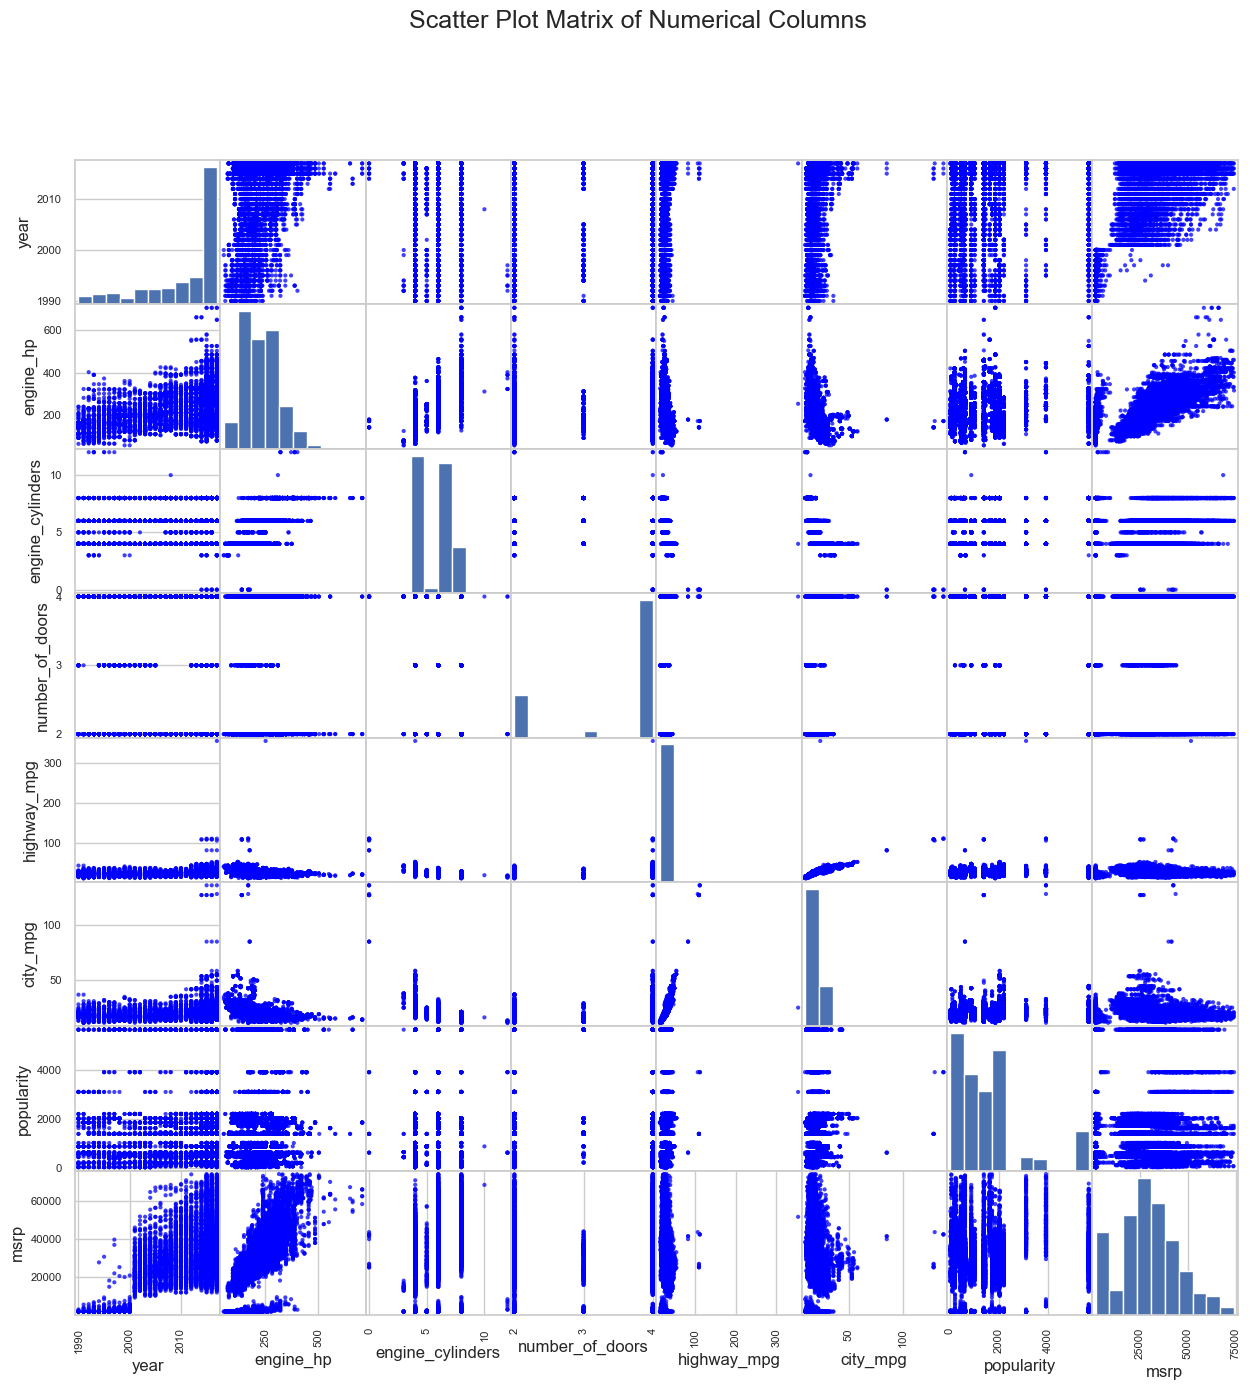

In [403]:
from pandas.plotting import scatter_matrix

# Plot scatter plot matrix for all numerical columns
plt.figure(figsize=(15, 15))
scatter_matrix(df2_wo_outliers.select_dtypes(include=['number']), alpha=0.75, figsize=(15, 15), diagonal='hist',
               color='blue')
plt.suptitle('Scatter Plot Matrix of Numerical Columns', fontsize=18)
plt.show()

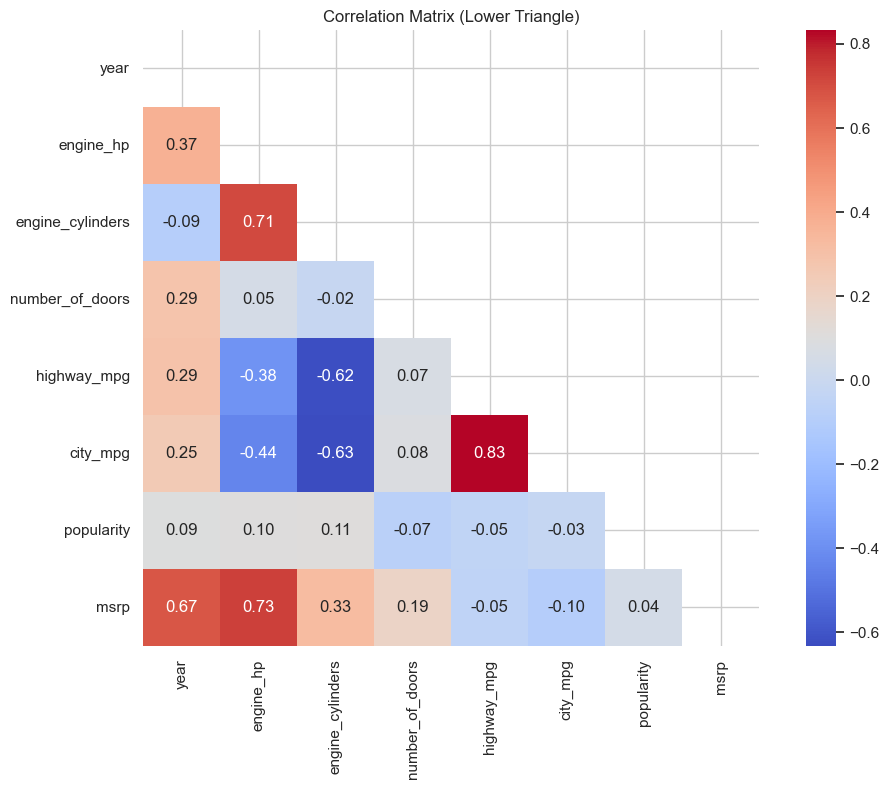

,A,B,correlation
0,city_mpg,highway_mpg,0.832324
1,engine_hp,msrp,0.733188
2,engine_cylinders,engine_hp,0.706988
3,msrp,year,0.672966


In [404]:
import numpy as np

corr_matrix = df2_wo_outliers.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Matrix (Lower Triangle)")
plt.show()

high_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.65]
result = pd.DataFrame()
for (col1, col2), corr_val in high_corr_pairs.items():
    if col1 < col2:
        result = pd.concat(
            [
                result,
                pd.DataFrame({
                    'A': [col1],
                    'B': [col2],
                    'correlation': [corr_val]
                })
            ],
            ignore_index=True
        )
result

## 3.2 Categorical-Categorical Correlation

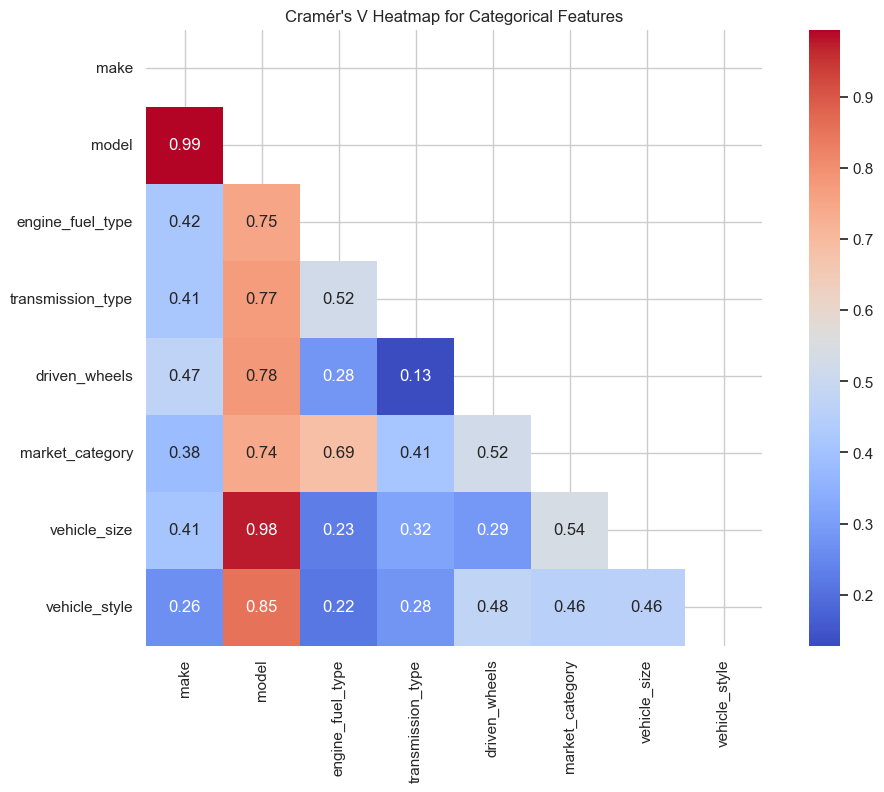

In [407]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

categorical_columns = df.select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        elif pd.isna(cramers_v_matrix.loc[col1, col2]):
            cramers_v_matrix.loc[col1, col2] = cramers_v_matrix.loc[col2, col1] = cramers_v(df[col1], df[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title("Cramér's V Heatmap for Categorical Features")
plt.show()

## 3.3 Categorical-Numerical Correlation
..